<a href="https://colab.research.google.com/github/ju-ki/atma10/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
sns.set()

In [3]:
INPUT_PATH = "/content/drive/MyDrive/atmacup10/data/raw/"
OUTPUT_PATH = "/content/drive/MyDrive/atmacup10/data/submission/"

In [4]:
train = pd.read_csv(INPUT_PATH + "train.csv")
test = pd.read_csv(INPUT_PATH + "test.csv")
print(train.shape, test.shape)

(12026, 19) (12008, 18)


In [5]:
print(train.info())
print("-"*50)
print(test.info())#直直欠損値がある.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   object_id                 12026 non-null  object 
 1   art_series_id             12026 non-null  object 
 2   title                     12026 non-null  object 
 3   description               8506 non-null   object 
 4   long_title                12026 non-null  object 
 5   principal_maker           12026 non-null  object 
 6   principal_or_first_maker  12025 non-null  object 
 7   sub_title                 11992 non-null  object 
 8   copyright_holder          713 non-null    object 
 9   more_title                11891 non-null  object 
 10  acquisition_method        11830 non-null  object 
 11  acquisition_date          11009 non-null  object 
 12  acquisition_credit_line   3525 non-null   object 
 13  dating_presenting_date    12016 non-null  object 
 14  dating

In [6]:
display(train.describe())
display(test.describe())

,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
count,12016.000000,12026.000000,12016.000000,11988.000000,12026.000000
mean,1769.769724,18.112673,1769.769724,1783.393143,81.915932
std,122.237041,1.353530,122.237041,122.344180,641.094570
min,1250.000000,-2.000000,1250.000000,1250.000000,0.000000
25%,1657.750000,17.000000,1657.750000,1672.000000,0.000000
50%,1808.000000,19.000000,1808.000000,1826.000000,3.000000
75%,1872.000000,19.000000,1872.000000,1890.000000,12.000000
max,2011.000000,21.000000,2011.000000,2011.000000,27392.000000


,dating_sorting_date,dating_period,dating_year_early,dating_year_late
count,12000.000000,12008.000000,12000.000000,11977.000000
mean,1771.248750,18.128331,1771.248750,1785.132587
std,121.558865,1.321395,121.558865,121.664020
min,1290.000000,-2.000000,1290.000000,1290.000000
25%,1660.000000,17.000000,1660.000000,1674.000000
50%,1810.000000,19.000000,1810.000000,1830.000000
75%,1873.000000,19.000000,1873.000000,1890.000000
max,2010.000000,21.000000,2010.000000,2010.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


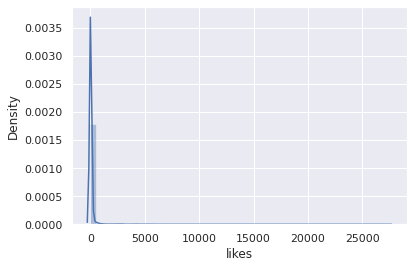

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


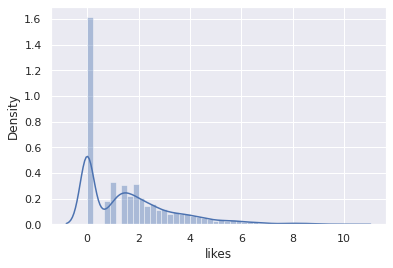

In [7]:
plt.subplots()
sns.distplot(train["likes"])
plt.show()

plt.subplots()
sns.distplot(np.log1p(train["likes"]))
plt.show()
#かなり偏りがある、log変換しても正規分布にはならない

In [8]:
def plot_intersection(left, right, column, set_labels, ax=None):
    left_set = set(left[column])
    right_set = set(right[column])
    venn2(subsets=(left_set, right_set), set_labels=set_labels, ax=ax)
    return ax

def plot_right_left_intersection(train_df, test_df, columns='__all__'):
    """2つのデータフレームのカラムの共通集合を可視化"""
    if columns == '__all__':
        columns = set(train_df.columns) & set(test_df.columns)

    columns = list(columns)
    nfigs = len(columns)
    ncols = 6
    nrows = - (- nfigs // ncols)
    fig, axes = plt.subplots(figsize=(3 * ncols, 3 * nrows), ncols=ncols, nrows=nrows)
    axes = np.ravel(axes)
    for c, ax in zip(columns, axes):
        plot_intersection(train_df, test_df, column=c, set_labels=('Train', 'Test'), ax=ax)
        ax.set_title(c)
    return fig, ax

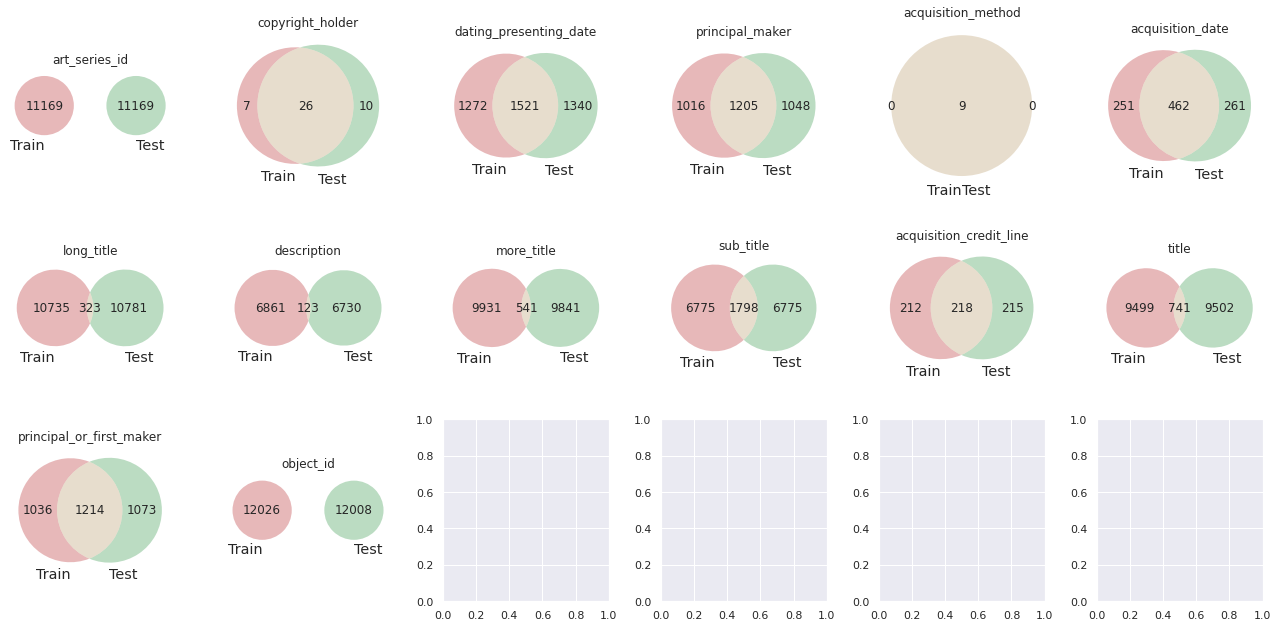

In [9]:
fig_features = ['object_id', 'art_series_id', 'title', 'description', 'long_title',
                'principal_maker', 'principal_or_first_maker', 'sub_title', 
                'copyright_holder', 'more_title', 'acquisition_method',
                'acquisition_date', 'acquisition_credit_line',
                'dating_presenting_date']

train_fig = train[fig_features]
test_fig = test[fig_features]
fig, _ = plot_right_left_intersection(train_fig, test_fig)
fig.tight_layout()#かなりばらけているがtitleなどは被るのはどうなのか→同じ作品

In [10]:
def load_multi_file(data_path, extension="*", num=3):

  list_dir = os.path.join(data_path, extension)
  list_data = glob.glob(list_dir)
  for file in list_data:
    data = pd.read_csv(file)
    print(f'{file}:{data.shape}')

load_multi_file(INPUT_PATH)

/content/drive/MyDrive/atmacup10/data/raw/train.csv:(12026, 19)
/content/drive/MyDrive/atmacup10/data/raw/principal_maker.csv:(24538, 6)
/content/drive/MyDrive/atmacup10/data/raw/maker.csv:(3291, 6)
/content/drive/MyDrive/atmacup10/data/raw/material.csv:(35394, 2)
/content/drive/MyDrive/atmacup10/data/raw/production_place.csv:(17686, 2)
/content/drive/MyDrive/atmacup10/data/raw/principal_maker_occupation.csv:(25372, 2)
/content/drive/MyDrive/atmacup10/data/raw/technique.csv:(20481, 2)
/content/drive/MyDrive/atmacup10/data/raw/historical_person.csv:(6745, 2)
/content/drive/MyDrive/atmacup10/data/raw/test.csv:(12008, 18)
/content/drive/MyDrive/atmacup10/data/raw/object_collection.csv:(14210, 2)
/content/drive/MyDrive/atmacup10/data/raw/color.csv:(73636, 3)
/content/drive/MyDrive/atmacup10/data/raw/atmacup10__sample_submission.csv:(12008, 1)
/content/drive/MyDrive/atmacup10/data/raw/palette.csv:(527890, 5)


In [11]:
color = pd.read_csv(INPUT_PATH + "color.csv")
color.head()

,object_id,percentage,hex
0,001020bd00b149970f78,0,#C7C7B6
1,001020bd00b149970f78,9,#5E5333
2,001020bd00b149970f78,14,#3E321B
3,001020bd00b149970f78,3,#B8AF84
4,001020bd00b149970f78,62,#15120C


In [12]:
history = pd.read_csv(INPUT_PATH + "historical_person.csv")
history.head()#オブジェクトに対しての作者の名前

,object_id,name
0,00133be3ff222c9b74b0,Staten-Generaal
1,00133be3ff222c9b74b0,"Álvarez de Toledo, Fernando (3e hertog van Alva)"
2,0026e030a0209b834b3e,Raad van Beroerten
3,0026e030a0209b834b3e,"Álvarez de Toledo, Fernando (3e hertog van Alva)"
4,00440ec5a4783b4b6bdb,Dolle Mina


In [13]:
maker = pd.read_csv(INPUT_PATH + "maker.csv")
maker.head()#作者の情報?

,name,place_of_birth,date_of_birth,date_of_death,place_of_death,nationality
0,'t Hooft,NaN,NaN,NaN,NaN,NaN
1,A. & G. Taylor,NaN,NaN,NaN,NaN,NaN
2,A. Böeseken,'s-Heerenberg,1834-01-12,1919-02-11,Rotterdam,NaN
3,A. Cucumus & Cie.,NaN,NaN,NaN,NaN,NaN
4,A. Dandoy,NaN,NaN,NaN,NaN,NaN


In [14]:
pri_maker = pd.read_csv(INPUT_PATH + "principal_maker.csv")
pri_maker.head()#主要な情報

,id,object_id,qualification,roles,productionPlaces,maker_name
0,1,000405d9a5e3f49fc49d,mentioned on object,NaN,NaN,Bernardus Bruining
1,2,001020bd00b149970f78,workshop of,painter,NaN,Jan Antonisz van Ravesteyn
2,3,0011d6be41612ec9eae3,NaN,painter,NaN,Jan Hackaert
3,4,0012765f7a97ccc3e9e9,attributed to,NaN,Netherlands,Richard Tepe
4,5,00133be3ff222c9b74b0,NaN,print maker,Northern Netherlands,Theodoor Koning


In [15]:
palette = pd.read_csv(INPUT_PATH + "palette.csv")
palette.head()#色の詳細な情報

,ratio,color_r,color_g,color_b,object_id
0,0.013781,40,4,0,000405d9a5e3f49fc49d
1,0.040509,221,189,129,000405d9a5e3f49fc49d
2,0.036344,207,175,117,000405d9a5e3f49fc49d
3,0.033316,230,197,129,000405d9a5e3f49fc49d
4,0.039600,194,161,106,000405d9a5e3f49fc49d


In [16]:
material = pd.read_csv(INPUT_PATH + "material.csv")
material.head()#素材

,object_id,name
0,000405d9a5e3f49fc49d,photographic paper
1,000405d9a5e3f49fc49d,cardboard
2,001020bd00b149970f78,oil paint (paint)
3,001020bd00b149970f78,panel
4,0011d6be41612ec9eae3,oil paint (paint)


In [17]:
place = pd.read_csv(INPUT_PATH + "production_place.csv")
place.head()

,object_id,name
0,0012765f7a97ccc3e9e9,Netherlands
1,00133be3ff222c9b74b0,Amsterdam
2,00133be3ff222c9b74b0,Northern Netherlands
3,0017be8caa87206532cb,Amsterdam
4,001b2b8c9d3aa1534dfe,Suriname


In [18]:
obj = pd.read_csv(INPUT_PATH + "object_collection.csv")
obj.head()

,object_id,name
0,001020bd00b149970f78,paintings
1,0011d6be41612ec9eae3,paintings
2,00133be3ff222c9b74b0,prints
3,00181d86ff1a7b95864e,paintings
4,001c52ae28ec106d9cd5,paintings


In [19]:
tech = pd.read_csv(INPUT_PATH + "technique.csv")
tech.head()

,object_id,name
0,000405d9a5e3f49fc49d,albumen print
1,0012765f7a97ccc3e9e9,salted paper print
2,0012765f7a97ccc3e9e9,albumen print
3,00133be3ff222c9b74b0,etching
4,0017be8caa87206532cb,albumen print


In [141]:
occupation = pd.read_csv(INPUT_PATH + "principal_maker_occupation.csv")
occupation.head()

,id,name
0,2,draughtsman
1,2,painter
2,3,print maker
3,3,draughtsman
4,3,painter


In [20]:
material['object_id'].value_counts()

ab33741600f376a3ac15    8
be28d52bba91c210cc3a    8
bfc8c29e85e8017b3115    8
d31b9d7a483e682a9f12    8
a16c465e2e6a12aa2e1b    7
                       ..
8c8a6558ecc71450c1c6    1
2460deac931a9d0f9767    1
64affe0d06e3346256e0    1
e2bef4098d855864b50c    1
905ba42c6817a7c3cd24    1
Name: object_id, Length: 23586, dtype: int64

In [21]:
cross_material = pd.crosstab(material["object_id"], material["name"])
cross_material

name,China paper,Japanese paper (handmade paper),RC paper,acrylic paint,alloy,amalgam,asbestos,asbestos-cement,ball-point pens,baryta paper,brass (alloy),bronze (metal),canvas,cardboard,casein paint,celluloid (cellulosic),chalk,copper (metal),cotton (textile),deck paint,enamel paint,gilding (material),glass,gold (metal),gold leaf,gouache (paint),hardboard,horn (animal material),human hair,ink,iron (metal),ivory,jade (rock),lacquer (coating),lead (metal),leather,linden,linen (material),looking glasses,mahogany (wood),metal,mother of pearl,oak (wood),oil (organic material),oil paint (paint),paint (coating),panel,paper,papier mâché,parchment (animal material),particle board,pear (wood),pencil,photographic paper,plush,plywood,poplar (wood),porcelain,prepared paper,printing ink,rope,silk,silver (metal),silver leaf,slate (rock),softwood,tempera,textile materials,tin (metal),tin alloy,tracing paper,transparant paper,velvet (fabric weave),watercolor (paint),wax,wood (plant material),wood board
object_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000405d9a5e3f49fc49d,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
001020bd00b149970f78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0011d6be41612ec9eae3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0012765f7a97ccc3e9e9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00133be3ff222c9b74b0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff1d87d79953ddab2c6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fff4bbb55fd7702d294e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fffbe07b997bec00e203,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# train = train.merge(cross_material, on="object_id", how="left")
# train.head()#discussionから

In [49]:
train.sample(5)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
7988,aabc41ddf1091829eba1,20d94c61b0c80b86acf7,Franse spotprent op de vermeende dood van Will...,Reproductie van Franse spotprent op de vermeen...,Franse spotprent op de vermeende dood van Will...,anonymous,anonymous,h 480mm × w 365mm,NaN,Franse spotprent op de vermeende dood van Will...,transfer,1816-01-01T00:00:00,NaN,1690,1690.0,17,1690.0,1690.0,5
3056,420764e7116679c438fb,77e86597c940ed8cb585,Vanitas Still Life,Vanitas stilleven. Op een tafel liggen een vio...,"Vanitas Still Life, Jacques de Claeuw, 1650",Jacques de Claeuw,Jacques de Claeuw,h 54cm × w 71cm × d 6.5cm,NaN,Vanitas Still Life,gift,1888-02-28T00:00:00,"Gift of A. Bredius, The Hague",1650,1650.0,17,1650.0,1650.0,121
4489,60bfd734dde718340a80,bc0ecf4b94be596a42ee,Lying-in Room of a Distinguished Turkish Woman,In het huis van een welgestelde familie wordt ...,Lying-in Room of a Distinguished Turkish Woman...,Jean Baptiste Vanmour,Jean Baptiste Vanmour,h 55.5cm × w 90cm × w 5.6kg,NaN,NaN,transfer,1902-01-01T00:00:00,NaN,c. 1720 - c. 1737,1720.0,18,1720.0,1737.0,117
7392,9e804e96f0aa709320c0,ee52612f4c41650a3f2c,Plant op een balkon,NaN,"Plant op een balkon, Adolphe Burdet (circle of...",Adolphe Burdet,Adolphe Burdet,h 89mm × w 119mm,NaN,Plant op een balkon,purchase,2000-01-01T00:00:00,NaN,1907 - 1930,1907.0,20,1907.0,1930.0,22
5178,6f02b928c8c71247805e,7fe7671f3414ebf238d4,Portret van een onbekende vrouw,NaN,"Portret van een onbekende vrouw, anonymous, 18...",anonymous,anonymous,h 56mm × w 44mm,NaN,Portret van een onbekende vrouw,transfer,1994-01-01T00:00:00,NaN,1840 - 1860,1840.0,19,1840.0,1860.0,0


In [118]:
def get_st_info(data, group_key, target_col, display_num=None, ascending=False):

  """
  集約した情報を渡す関数
      data: data,
      group_key: 集約したいカラム,
      target_col: 対象となるカラム,
      display_num: 表示する個数（defaultはNone）
      ascending:　defaultはFalse
  """

  print("-------------------------------mean------------------------------------")
  display(data.groupby(group_key).agg({target_col:"mean"}).sort_values(target_col, ascending=ascending).head(display_num))
  print("-------------------------------median------------------------------------")
  display(data.groupby(group_key).agg({target_col:"mean"}).sort_values(target_col, ascending=ascending).head(display_num))
  print("-------------------------------max------------------------------------")
  display(data.groupby(group_key).agg({target_col:"mean"}).sort_values(target_col, ascending=ascending).head(display_num))
  print("-------------------------------min------------------------------------")
  display(data.groupby(group_key).agg({target_col:"mean"}).sort_values(target_col, ascending=ascending).head(display_num))
  print("-------------------------------std------------------------------------")
  display(data.groupby(group_key).agg({target_col:"mean"}).sort_values(target_col, ascending=ascending).head(display_num))

## ・Acquisiton_method

In [25]:
train["acquisition_method"].value_counts()

purchase                4253
transfer                3795
gift                    1578
unknown                 1157
bequest                  584
loan                     404
nationalization 1795      45
exchange                  14
Name: acquisition_method, dtype: int64

In [28]:
print("--------------------------------------------mean---------------------------------------------------")
display(train.groupby("acquisition_method").agg({"likes":"mean"}))
print("--------------------------------------------median---------------------------------------------------")
display(train.groupby("acquisition_method").agg({"likes":"median"}))
print("--------------------------------------------max---------------------------------------------------")
display(train.groupby("acquisition_method").agg({"likes":"max"}))
print("--------------------------------------------mim---------------------------------------------------")
display(train.groupby("acquisition_method").agg({"likes":"min"}))
print("--------------------------------------------std---------------------------------------------------")
display(train.groupby("acquisition_method").agg({"likes":"std"}))

--------------------------------------------mean---------------------------------------------------


,likes
acquisition_method,
bequest,305.210616
exchange,144.000000
gift,69.780735
loan,483.123762
nationalization 1795,387.955556
purchase,93.059487
transfer,18.722793
unknown,11.201383


--------------------------------------------median---------------------------------------------------


,likes
acquisition_method,
bequest,40
exchange,12
gift,3
loan,23
nationalization 1795,32
purchase,4
transfer,0
unknown,2


--------------------------------------------max---------------------------------------------------


,likes
acquisition_method,
bequest,19698
exchange,1664
gift,10303
loan,27392
nationalization 1795,5497
purchase,14172
transfer,4518
unknown,1241


--------------------------------------------mim---------------------------------------------------


,likes
acquisition_method,
bequest,0
exchange,0
gift,0
loan,0
nationalization 1795,6
purchase,0
transfer,0
unknown,0


--------------------------------------------std---------------------------------------------------


,likes
acquisition_method,
bequest,1391.544156
exchange,440.471426
gift,458.165059
loan,2105.548954
nationalization 1795,1166.817290
purchase,571.028820
transfer,178.613044
unknown,60.003014


## Dating_year_early

In [34]:
train["dating_year_early"].value_counts().head(10)

1860.0    342
1900.0    321
1855.0    279
1870.0    235
1850.0    226
1880.0    226
1890.0    183
1863.0    153
1857.0    152
1851.0    150
Name: dating_year_early, dtype: int64

In [97]:
print("------------------------------上位-------------------------------------")
print("-------------------------------mean------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"mean"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------median------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"median"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------max------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"max"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------min------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"min"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------std------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"std"}).sort_values("likes", ascending=False).head(20))

print("-----------------------------下位-------------------------------------")
print("-------------------------------mean------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"mean"}).sort_values("likes", ascending=True).head(20))
print("-------------------------------median------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"median"}).sort_values("likes", ascending=True).head(20))
print("-------------------------------max------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"max"}).sort_values("likes", ascending=True).head(20))
print("-------------------------------min------------------------------------")
display(train.groupby("dating_year_early").agg({"likes":"min"}).sort_values("likes", ascending=True).head(20))

------------------------------上位-------------------------------------
-------------------------------mean------------------------------------


,likes
dating_year_early,
1894.0,2144.571429
1642.0,2128.055556
1836.0,1649.000000
1962.0,1578.500000
1707.0,1571.000000
1668.0,1272.615385
1641.0,1248.000000
1482.0,1204.500000
1657.0,1145.000000


-------------------------------median------------------------------------


,likes
dating_year_early,
1836.0,1649.0
1962.0,1578.5
1482.0,1204.5
1798.0,1111.0
1707.0,532.0
1743.0,341.5
1542.0,277.0
1668.0,258.0
1435.0,251.0


-------------------------------max------------------------------------


,likes
dating_year_early,
1642.0,27392
1650.0,21685
1872.0,19698
1894.0,14867
1807.0,14172
1876.0,12432
1639.0,10555
1887.0,10303
1663.0,10170


-------------------------------min------------------------------------


,likes
dating_year_early,
1482.0,848
1542.0,277
1435.0,251
1504.0,185
1507.0,169
1812.0,158
1495.0,142
1381.0,112
1300.0,105


-------------------------------std------------------------------------


,likes
dating_year_early,
1642.0,6476.249663
1894.0,5610.233116
1807.0,3783.473371
1872.0,3424.982477
1668.0,2662.724780
1650.0,2435.898614
1887.0,2294.137515
1707.0,2267.660248
1657.0,2248.838811


-----------------------------下位-------------------------------------
-------------------------------mean------------------------------------


,likes
dating_year_early,
2011.0,0.000000
2007.0,0.000000
1536.0,0.000000
1924.0,0.000000
1559.0,0.000000
1758.0,0.166667
1753.0,0.333333
1963.0,0.600000
1957.0,0.666667


-------------------------------median------------------------------------


,likes
dating_year_early,
2011.0,0.0
1735.0,0.0
1734.0,0.0
1711.0,0.0
1874.0,0.0
1920.0,0.0
1875.0,0.0
1706.0,0.0
1705.0,0.0


-------------------------------max------------------------------------


,likes
dating_year_early,
2011.0,0
2007.0,0
1536.0,0
1559.0,0
1924.0,0
1753.0,1
1758.0,1
1952.0,1
1958.0,2


-------------------------------min------------------------------------


,likes
dating_year_early,
2011.0,0
1889.0,0
1756.0,0
1755.0,0
1754.0,0
1753.0,0
1890.0,0
1891.0,0
1750.0,0


In [35]:
train["dating_year_late"].value_counts().head(10)

1900.0    370
1890.0    271
1870.0    267
1880.0    219
1930.0    214
1898.0    199
1910.0    191
1885.0    168
1893.0    155
1895.0    153
Name: dating_year_late, dtype: int64

In [38]:
train["dating_presenting_date"].value_counts().head(10)#具体的な数字は出ていない

1898                 128
1704                 110
1855 - 1885          109
c. 1973 - c. 1975     98
1727 - 1733           88
1688 - 1698           87
c. 1913 - c. 1927     85
1889 - 1893           83
c. 1900 - c. 1930     77
1823 - 1883           64
Name: dating_presenting_date, dtype: int64

In [47]:
train["dating_sorting_date"].value_counts().head(10)#制作期間の始まりの方を取っている？

1860.0    342
1900.0    321
1855.0    279
1870.0    235
1850.0    226
1880.0    226
1890.0    183
1863.0    153
1857.0    152
1851.0    150
Name: dating_sorting_date, dtype: int64

## Dating_period

In [36]:
train["dating_period"].value_counts()

 19    5042
 17    3005
 18    1620
 16    1240
 20     973
 21      78
 15      52
-2       10
 14       4
 13       2
Name: dating_period, dtype: int64

In [83]:
print("-------------------------------mean------------------------------------")
display(train.groupby('dating_period').agg({"likes":"mean"}).sort_values("likes", ascending=False))
print("-------------------------------median------------------------------------")
display(train.groupby('dating_period').agg({"likes":"median"}).sort_values("likes", ascending=False))
print("-------------------------------max------------------------------------")
display(train.groupby('dating_period').agg({"likes":"max"}).sort_values("likes", ascending=False))
print("-------------------------------min------------------------------------")
display(train.groupby('dating_period').agg({"likes":"min"}).sort_values("likes", ascending=False))
print("-------------------------------std------------------------------------")
display(train.groupby('dating_period').agg({"likes":"std"}).sort_values("likes", ascending=False))

-------------------------------mean------------------------------------


,likes
dating_period,
15,181.576923
17,173.009983
14,104.750000
13,73.000000
18,55.250000
19,54.871876
16,41.701613
20,37.681398
-2,8.100000


-------------------------------median------------------------------------


,likes
dating_period,
14,107.0
13,73.0
15,68.0
17,7.0
-2,6.5
16,4.0
21,4.0
18,3.0
20,3.0


-------------------------------max------------------------------------


,likes
dating_period,
17,27392
19,19698
18,5602
16,5203
20,4952
15,1619
14,129
13,105
21,59


-------------------------------min------------------------------------


,likes
dating_period,
14,76
13,41
-2,0
15,0
16,0
17,0
18,0
19,0
20,0


-------------------------------std------------------------------------


,likes
dating_period,
17,978.011651
19,561.095419
18,411.206222
15,367.395995
20,284.071789
16,266.698636
13,45.254834
14,22.171679
21,10.419897


## Period_of_production

In [103]:
train["period_of_production"] = train["dating_year_late"] - train["dating_year_early"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


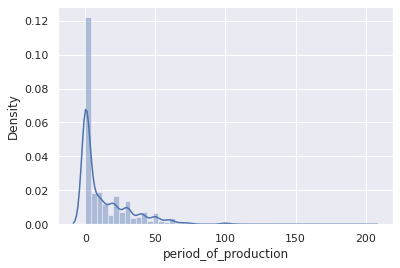

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


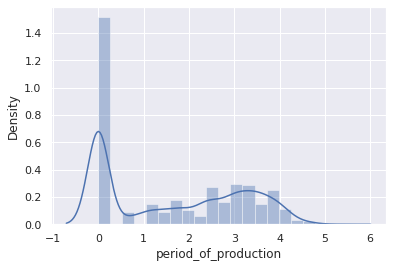

In [110]:
plt.subplots()
sns.distplot(train["period_of_production"])
plt.show()

plt.subplots()
sns.distplot(np.log1p(train["period_of_production"]))
plt.show()

In [106]:
train["period_of_production"].value_counts().head(20)

0.0     4817
20.0     612
10.0     551
2.0      465
30.0     463
3.0      293
5.0      279
4.0      279
1.0      276
15.0     267
6.0      224
40.0     194
11.0     153
50.0     147
14.0     138
25.0     136
8.0      122
60.0     116
13.0     112
7.0      111
Name: period_of_production, dtype: int64

In [108]:
print("-------------------------------mean------------------------------------")
display(train.groupby("period_of_production").agg({"likes":"mean"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------median------------------------------------")
display(train.groupby("period_of_production").agg({"likes":"median"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------max------------------------------------")
display(train.groupby("period_of_production").agg({"likes":"max"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------min------------------------------------")
display(train.groupby("period_of_production").agg({"likes":"min"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------std------------------------------------")
display(train.groupby("period_of_production").agg({"likes":"std"}).sort_values("likes", ascending=False).head(20))

-------------------------------mean------------------------------------


,likes
period_of_production,
33.0,1018.814815
58.0,342.000000
19.0,314.809524
120.0,311.000000
160.0,278.000000
16.0,220.720930
43.0,150.614035
24.0,125.342466
0.0,121.267802


-------------------------------median------------------------------------


,likes
period_of_production,
120.0,311.0
160.0,278.0
95.0,94.0
199.0,32.5
66.0,27.5
130.0,26.0
42.0,24.5
97.0,22.0
106.0,21.0


-------------------------------max------------------------------------


,likes
period_of_production,
0.0,27392
33.0,21685
19.0,9242
11.0,9035
16.0,8404
4.0,8052
8.0,7222
24.0,6509
2.0,6081


-------------------------------min------------------------------------


,likes
period_of_production,
120.0,311
160.0,278
95.0,94
130.0,26
97.0,22
106.0,21
94.0,12
199.0,11
101.0,11


-------------------------------std------------------------------------


,likes
period_of_production,
33.0,4228.312093
16.0,1279.278132
19.0,1271.608796
58.0,956.827645
0.0,840.130511
24.0,760.865228
11.0,733.182602
8.0,658.802012
4.0,651.862814


## Principal_maker

In [32]:
train["principal_maker"].value_counts().head(10)

anonymous                   1692
Johann Sadeler (I)           347
Bernard Picart               273
Richard Tepe                 180
anoniem (Monumentenzorg)     170
Jan Luyken                   149
Raphaël Sadeler (I)          148
Woodbury & Page              136
Romeyn de Hooghe             132
Aegidius Sadeler             120
Name: principal_maker, dtype: int64

In [53]:
train["principal_or_first_maker"].value_counts().head(10)

anonymous                                  1650
Johann Sadeler (I)                          347
Bernard Picart                              273
Richard Tepe                                180
Jan Luyken                                  149
Raphaël Sadeler (I)                         148
Woodbury & Page                             136
Romeyn de Hooghe                            132
Aegidius Sadeler                            120
anoniem (Monumentenzorg), A.J.M. Mulder     119
Name: principal_or_first_maker, dtype: int64

In [81]:
print("-------------------------------mean------------------------------------")
display(train.groupby("principal_maker").agg({"likes":"mean"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------median------------------------------------")
display(train.groupby("principal_maker").agg({"likes":"median"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------max------------------------------------")
display(train.groupby("principal_maker").agg({"likes":"max"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------min------------------------------------")
display(train.groupby("principal_maker").agg({"likes":"min"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------std------------------------------------")
display(train.groupby("principal_maker").agg({"likes":"std"}).sort_values("likes", ascending=False).head(20))

-------------------------------mean------------------------------------


,likes
principal_maker,
Jan Davidsz. de Heem,21685.000000
Hans Bollongier,10555.000000
Vincent van Gogh,10303.000000
Johannes Vermeer,10170.000000
Jan van Kessel (I),7222.000000
Hendrik Voogd,7121.000000
Hendrikus van de Sande Bakhuyzen,5663.000000
Giovanni Battista Tiepolo,5602.000000
Antonio Francesco Peruzzini,5185.000000


-------------------------------median------------------------------------


,likes
principal_maker,
Jan Davidsz. de Heem,21685.0
Hans Bollongier,10555.0
Vincent van Gogh,10303.0
Johannes Vermeer,10170.0
Jan van Kessel (I),7222.0
Hendrik Voogd,7121.0
Hendrikus van de Sande Bakhuyzen,5663.0
Giovanni Battista Tiepolo,5602.0
Antonio Francesco Peruzzini,5185.0


-------------------------------max------------------------------------


,likes
principal_maker,
Rembrandt van Rijn,27392
Jan Davidsz. de Heem,21685
Jozef Israëls,19698
George Hendrik Breitner,14867
Hendrik Voogd,14172
Anton Mauve,12432
Jan Asselijn,11544
Hans Bollongier,10555
Vincent van Gogh,10303


-------------------------------min------------------------------------


,likes
principal_maker,
Jan Davidsz. de Heem,21685
Hans Bollongier,10555
Vincent van Gogh,10303
Johannes Vermeer,10170
Jan van Kessel (I),7222
Hendrikus van de Sande Bakhuyzen,5663
Giovanni Battista Tiepolo,5602
Antonio Francesco Peruzzini,5185
Jan Adriaensz. van Staveren,5091


-------------------------------std------------------------------------


,likes
principal_maker,
Hendrik Voogd,9971.619828
Rembrandt van Rijn,5812.960407
Jan Asselijn,5421.454756
Jozef Israëls,5053.646851
Francesco Zugno,3930.099490
Eglon van der Neer,3832.518754
Anton Mauve,3825.957055
Frans van Mieris (II),3570.889245
Abraham Mignon,3456.258247


## Copyright_holder

In [39]:
train["copyright_holder"].value_counts()

erven Richard Tepe                                180
Willem Diepraam                                   105
Jacob R. Olie                                     104
Stichting Kessler-de Lange                         79
erven Théodore van Lelyveld                        68
Jozef van Ruyssevelt                               31
Jan Banning                                        22
erven Cor Jaring                                   22
Ilse Frech                                         18
Jannes Linders/In opdracht van Atelier HSL         13
Coen Tasman                                        12
Pieter Boersma                                     11
R. van der Lingen                                  10
Rob Sannes                                          4
Frank van der Salm/In opdracht van Atelier HSL      4
Martin Roemers                                      4
erven Paul Huf/Maria Austria Instituut              4
Wout Berger                                         2
Eddy Wessels                

In [113]:
print("-------------------------------mean------------------------------------")
display(train.groupby("copyright_holder").agg({"likes":"mean"}).sort_values("likes", ascending=False).head(10))
print("-------------------------------median------------------------------------")
display(train.groupby("copyright_holder").agg({"likes":"median"}).sort_values("likes", ascending=False).head(10))
print("-------------------------------max------------------------------------")
display(train.groupby("copyright_holder").agg({"likes":"max"}).sort_values("likes", ascending=False).head(10))
print("-------------------------------min------------------------------------")
display(train.groupby("copyright_holder").agg({"likes":"min"}).sort_values("likes", ascending=False).head(10))
print("-------------------------------std------------------------------------")
display(train.groupby("copyright_holder").agg({"likes":"std"}).sort_values("likes", ascending=False).head(10))

-------------------------------mean------------------------------------


,likes
copyright_holder,
Rob Sannes,1500.000000
The estate of Erwin Blumenfeld,51.000000
Jacob R. Olie,45.528846
Frido Troost,32.000000
Armando,16.000000
erven Paul Huf/Maria Austria Instituut,13.250000
Jan Banning,12.727273
erven Richard Tepe,11.144444
Bertien van Manen,11.000000


-------------------------------median------------------------------------


,likes
copyright_holder,
Rob Sannes,1436.5
The estate of Erwin Blumenfeld,51.0
Frido Troost,32.0
Armando,16.0
Bertien van Manen,11.0
erven Paul Huf/Maria Austria Instituut,10.5
Jacob R. Olie,10.0
erven Christiaan Otto Roelofs,10.0
Jan Banning,9.0


-------------------------------max------------------------------------


,likes
copyright_holder,
Rob Sannes,3107
Jacob R. Olie,2824
erven Richard Tepe,280
The estate of Erwin Blumenfeld,95
Jan Banning,59
Stichting Kessler-de Lange,46
erven Théodore van Lelyveld,42
Jannes Linders/In opdracht van Atelier HSL,36
Willem Diepraam,35


-------------------------------min------------------------------------


,likes
copyright_holder,
Frido Troost,32
Rob Sannes,20
Armando,16
Bertien van Manen,11
erven Christiaan Otto Roelofs,10
Krystyna Ziach,7
erven Paul Huf/Maria Austria Instituut,7
The estate of Erwin Blumenfeld,7
Eddy Wessels,6


-------------------------------std------------------------------------


,likes
copyright_holder,
Rob Sannes,1695.649138
Jacob R. Olie,276.511555
The estate of Erwin Blumenfeld,62.225397
erven Richard Tepe,27.680363
Jan Banning,14.449194
Jannes Linders/In opdracht van Atelier HSL,9.870313
Wout Berger,9.192388
Ilse Frech,8.370505
erven Paul Huf/Maria Austria Instituut,8.261356


## Art_series_id

In [121]:
train["art_series_id"].value_counts().head(40)

b40586f3c4e05771b221    9
f7ed7bf1f093c97f1f9e    8
ba68a3c8f4fae208aa76    8
2f616571b1acd2e7a0c4    8
ce4bc6f72a2d891ca879    7
d9fb07d0a4a93a8ef3dc    7
7468b58c47161b13bde2    7
81f184bc44d573020783    7
f1876557c12342e994f5    6
8c4d2cf0dca06c6d0d66    6
a18b6f2cd65574d67a15    5
752b3794605414576212    5
99507fede9ae4e06fb54    5
43fde2a167a144d8bda3    5
762f07c8eb1a29bede71    5
d0464ec3fa4e26706539    5
dc6541a114f8f4e5690d    5
e72117e8fb421317af05    5
4b018f3faffbfa67f13b    4
b116c888c21953842575    4
8aa9f98d16383b599878    4
95db93b339638e553f03    4
c94c6bb53256f88e6330    4
c410ac30a8a9d247f7b5    4
b39a50db9041f7cafa0b    4
8409f23475436bec28d2    4
5fc3ef3639e2c9daf7d7    4
c946c30ae63bfa27972e    4
01bdee3a06570eeb6649    4
91cba13dc841b0bce0ce    4
fca9948b6dd47b5c439f    4
d0ef00393ce973e73033    4
766835930743d44f1296    4
8dba0d71fea974b3624e    4
adede24e45f9ef0709fa    4
06e2638b5e608e0b7ca9    4
4619170436e8ec7d312b    4
d8be0598cce105e22400    4
5755097162e1

In [112]:
print("-------------------------------mean------------------------------------")
display(train.groupby("art_series_id").agg({"likes":"mean"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------median------------------------------------")
display(train.groupby("art_series_id").agg({"likes":"median"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------max------------------------------------")
display(train.groupby("art_series_id").agg({"likes":"max"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------min------------------------------------")
display(train.groupby("art_series_id").agg({"likes":"min"}).sort_values("likes", ascending=False).head(20))
print("-------------------------------std------------------------------------")
display(train.groupby("art_series_id").agg({"likes":"std"}).sort_values("likes", ascending=False).head(20))

-------------------------------mean------------------------------------


,likes
art_series_id,
b3fe6620a23a80a4766d,27392.0
4835e3cb2e57975817d7,21685.0
37176565918cd6413a82,19698.0
b86e2209561a42cf9044,14867.0
063a112835f930db2fae,14172.0
48d7ae9b008de63610e9,12432.0
db1c9c2f590545afd787,11544.0
9ff6ff7baf194f00125a,10555.0
f90ee5f2c7053ba97dd3,10303.0


-------------------------------median------------------------------------


,likes
art_series_id,
b3fe6620a23a80a4766d,27392.0
4835e3cb2e57975817d7,21685.0
37176565918cd6413a82,19698.0
b86e2209561a42cf9044,14867.0
063a112835f930db2fae,14172.0
48d7ae9b008de63610e9,12432.0
db1c9c2f590545afd787,11544.0
9ff6ff7baf194f00125a,10555.0
f90ee5f2c7053ba97dd3,10303.0


-------------------------------max------------------------------------


,likes
art_series_id,
b3fe6620a23a80a4766d,27392
4835e3cb2e57975817d7,21685
37176565918cd6413a82,19698
b86e2209561a42cf9044,14867
063a112835f930db2fae,14172
48d7ae9b008de63610e9,12432
db1c9c2f590545afd787,11544
9ff6ff7baf194f00125a,10555
f90ee5f2c7053ba97dd3,10303


-------------------------------min------------------------------------


,likes
art_series_id,
b3fe6620a23a80a4766d,27392
4835e3cb2e57975817d7,21685
37176565918cd6413a82,19698
b86e2209561a42cf9044,14867
063a112835f930db2fae,14172
48d7ae9b008de63610e9,12432
db1c9c2f590545afd787,11544
9ff6ff7baf194f00125a,10555
f90ee5f2c7053ba97dd3,10303


-------------------------------std------------------------------------


,likes
art_series_id,
8dba0d71fea974b3624e,542.459522
bf702198f615d9a7efec,327.390440
045309aeb2d43bd20d84,263.043723
aa01592866515c8c057b,231.000000
1e2e51e79a471aab6775,212.839141
27eef95de196dc98c5b6,77.781746
4f552690a4f360c11cde,44.547727
be429e665c713ad95492,36.769553
8c9c31e596658f20f840,36.062446


## Acquisition_date

In [60]:
train["acquisition_date"].value_counts().head(10)

1994-01-01T00:00:00    2346
1816-01-01T00:00:00     981
1881-01-01T00:00:00     645
2007-01-01T00:00:00     301
1995-01-01T00:00:00     237
2000-01-01T00:00:00     231
1999-01-01T00:00:00     181
2018-01-01T00:00:00     177
1905-01-01T00:00:00     164
1998-01-01T00:00:00     158
Name: acquisition_date, dtype: int64

In [102]:
print("-------------------------------mean------------------------------------")
display(train.groupby("acquisition_date").agg({"likes":"mean"}).sort_values("likes", ascending=False).head(10))
print("-------------------------------median------------------------------------")
display(train.groupby("acquisition_date").agg({"likes":"median"}).sort_values("likes", ascending=False).head(10))
print("-------------------------------max------------------------------------")
display(train.groupby("acquisition_date").agg({"likes":"max"}).sort_values("likes", ascending=False).head(10))
print("-------------------------------min------------------------------------")
display(train.groupby("acquisition_date").agg({"likes":"min"}).sort_values("likes", ascending=False).head(10))
print("-------------------------------std------------------------------------")
display(train.groupby("acquisition_date").agg({"likes":"std"}).sort_values("likes", ascending=False).head(10))

-------------------------------mean------------------------------------


,likes
acquisition_date,
1800-06-11T00:00:00,11544.0
1851-11-25T00:00:00,6897.0
1900-10-01T00:00:00,6673.0
2006-07-11T00:00:00,4314.0
2009-12-09T00:00:00,4117.0
1913-12-01T00:00:00,4070.0
2001-05-08T00:00:00,3973.0
1928-11-01T00:00:00,3442.0
1897-05-01T00:00:00,3262.0


-------------------------------median------------------------------------


,likes
acquisition_date,
1800-06-11T00:00:00,11544.0
1851-11-25T00:00:00,6897.0
1900-10-01T00:00:00,6673.0
2006-07-11T00:00:00,4314.0
2009-12-09T00:00:00,4117.0
1913-12-01T00:00:00,4070.0
2001-05-08T00:00:00,3973.0
1928-11-01T00:00:00,3442.0
1861-01-01T00:00:00,3223.0


-------------------------------max------------------------------------


,likes
acquisition_date,
1808-01-01T00:00:00,27392
1885-06-30T00:00:00,21685
1907-01-01T00:00:00,19698
1944-01-01T00:00:00,14867
1976-01-01T00:00:00,14172
1800-06-11T00:00:00,11544
1883-11-01T00:00:00,10555
1936-06-01T00:00:00,10303
1870-01-01T00:00:00,9242


-------------------------------min------------------------------------


,likes
acquisition_date,
1800-06-11T00:00:00,11544
1851-11-25T00:00:00,6897
1900-10-01T00:00:00,6673
2006-07-11T00:00:00,4314
2009-12-09T00:00:00,4117
1913-12-01T00:00:00,4070
2001-05-08T00:00:00,3973
1861-01-01T00:00:00,3223
2016-06-02T00:00:00,3007


-------------------------------std------------------------------------


,likes
acquisition_date,
1976-01-01T00:00:00,4993.696226
1928-11-01T00:00:00,4729.130153
1883-11-01T00:00:00,4605.330629
1808-01-01T00:00:00,4086.014091
1897-05-01T00:00:00,3962.284694
1944-01-01T00:00:00,3451.736093
1936-06-01T00:00:00,3193.140627
1885-06-30T00:00:00,2795.708491
1818-01-01T00:00:00,2715.553397


## Acquisition_credit_line

In [57]:
train["acquisition_credit_line"].value_counts().head(10)

Purchased with the support of the F.G. Waller-Fonds                                                                    567
Gift of the Stichting Kessler-de Lange                                                                                 209
Gift of W. Diepraam, Amsterdam                                                                                         190
On loan from the City of Amsterdam (A. van der Hoop Bequest)                                                           102
On loan from W. Diepraam, Amsterdam                                                                                    101
Gift of M. Onnes van Nijenrode                                                                                          97
Purchased with the support of the Vereniging Rembrandt                                                                  92
Purchased with the support of the Maria Adriana Aalders Fonds/Rijksmuseum Fonds and the Prins Bernhard Cultuurfonds     77
Gift of the heir

In [124]:
get_st_info(train, group_key="acquisition_credit_line", target_col="likes", display_num=10)

-------------------------------mean------------------------------------


,likes
acquisition_credit_line,
On loan from the Familie Van Weede Stichting,7732.0
"Gift of F.W.M., Baroness Bonger-van der Borch van Verwolde, Almen",5264.5
Purchased with the support of the Commissie voor de Willem de Zwijgertentoonstelling,5203.0
"Gift of R. Noortman, Maastricht",5050.0
On loan from the Dienst voor 's Rijks Verspreide Kunstvoorwerpen,4890.0
"Purchased with the support of the BankGiro Lottery, he Rijksmuseum Fonds and the Vereniging Rembrandt, with additional funding from the Prins Bernhard Cultuurfonds",4314.0
Purchased with the support of the Ministerie van CRM and the Rijksmuseum-Stichting,3640.0
"Joint acquisition by the Dutch State and the French Republic, collection Rijksmuseum/collection Musée du Louvre",3007.0
Purchased with the support of the Rijksmuseum Fonds,2903.0


-------------------------------median------------------------------------


,likes
acquisition_credit_line,
On loan from the Familie Van Weede Stichting,7732.0
"Gift of F.W.M., Baroness Bonger-van der Borch van Verwolde, Almen",5264.5
Purchased with the support of the Commissie voor de Willem de Zwijgertentoonstelling,5203.0
"Gift of R. Noortman, Maastricht",5050.0
On loan from the Dienst voor 's Rijks Verspreide Kunstvoorwerpen,4890.0
"Purchased with the support of the BankGiro Lottery, he Rijksmuseum Fonds and the Vereniging Rembrandt, with additional funding from the Prins Bernhard Cultuurfonds",4314.0
Purchased with the support of the Ministerie van CRM and the Rijksmuseum-Stichting,3640.0
"Joint acquisition by the Dutch State and the French Republic, collection Rijksmuseum/collection Musée du Louvre",3007.0
Purchased with the support of the Rijksmuseum Fonds,2903.0


-------------------------------max------------------------------------


,likes
acquisition_credit_line,
On loan from the Familie Van Weede Stichting,7732.0
"Gift of F.W.M., Baroness Bonger-van der Borch van Verwolde, Almen",5264.5
Purchased with the support of the Commissie voor de Willem de Zwijgertentoonstelling,5203.0
"Gift of R. Noortman, Maastricht",5050.0
On loan from the Dienst voor 's Rijks Verspreide Kunstvoorwerpen,4890.0
"Purchased with the support of the BankGiro Lottery, he Rijksmuseum Fonds and the Vereniging Rembrandt, with additional funding from the Prins Bernhard Cultuurfonds",4314.0
Purchased with the support of the Ministerie van CRM and the Rijksmuseum-Stichting,3640.0
"Joint acquisition by the Dutch State and the French Republic, collection Rijksmuseum/collection Musée du Louvre",3007.0
Purchased with the support of the Rijksmuseum Fonds,2903.0


-------------------------------min------------------------------------


,likes
acquisition_credit_line,
On loan from the Familie Van Weede Stichting,7732.0
"Gift of F.W.M., Baroness Bonger-van der Borch van Verwolde, Almen",5264.5
Purchased with the support of the Commissie voor de Willem de Zwijgertentoonstelling,5203.0
"Gift of R. Noortman, Maastricht",5050.0
On loan from the Dienst voor 's Rijks Verspreide Kunstvoorwerpen,4890.0
"Purchased with the support of the BankGiro Lottery, he Rijksmuseum Fonds and the Vereniging Rembrandt, with additional funding from the Prins Bernhard Cultuurfonds",4314.0
Purchased with the support of the Ministerie van CRM and the Rijksmuseum-Stichting,3640.0
"Joint acquisition by the Dutch State and the French Republic, collection Rijksmuseum/collection Musée du Louvre",3007.0
Purchased with the support of the Rijksmuseum Fonds,2903.0


-------------------------------std------------------------------------


,likes
acquisition_credit_line,
On loan from the Familie Van Weede Stichting,7732.0
"Gift of F.W.M., Baroness Bonger-van der Borch van Verwolde, Almen",5264.5
Purchased with the support of the Commissie voor de Willem de Zwijgertentoonstelling,5203.0
"Gift of R. Noortman, Maastricht",5050.0
On loan from the Dienst voor 's Rijks Verspreide Kunstvoorwerpen,4890.0
"Purchased with the support of the BankGiro Lottery, he Rijksmuseum Fonds and the Vereniging Rembrandt, with additional funding from the Prins Bernhard Cultuurfonds",4314.0
Purchased with the support of the Ministerie van CRM and the Rijksmuseum-Stichting,3640.0
"Joint acquisition by the Dutch State and the French Republic, collection Rijksmuseum/collection Musée du Louvre",3007.0
Purchased with the support of the Rijksmuseum Fonds,2903.0


## Title

In [63]:
train["title"].value_counts().head(10)

Portret van een onbekende vrouw          89
Portret van een onbekende man            67
Portrait of a Man                        25
Portret van een onbekende jonge vrouw    24
Portret van een vrouw                    21
Portrait of a Woman                      20
Portret van een onbekende jongen         14
Christus aan het kruis                   12
Portret van een man                      12
Self-Portrait                            11
Name: title, dtype: int64

In [126]:
get_st_info(train, "title", "likes", 10)

-------------------------------mean------------------------------------


,likes
title,
"Night Watch, Militia Company of District II under the Command of Captain Frans Banninck Cocq",27392.0
Still Life with Flowers in a Glass Vase,21685.0
Children of the Sea,19698.0
Girl in a White Kimono,14867.0
Italian Landscape with Umbrella Pines,14172.0
Morning Ride along the Beach,12432.0
The Threatened Swan,11544.0
Floral Still Life,10555.0
Woman Reading a Letter,10170.0


-------------------------------median------------------------------------


,likes
title,
"Night Watch, Militia Company of District II under the Command of Captain Frans Banninck Cocq",27392.0
Still Life with Flowers in a Glass Vase,21685.0
Children of the Sea,19698.0
Girl in a White Kimono,14867.0
Italian Landscape with Umbrella Pines,14172.0
Morning Ride along the Beach,12432.0
The Threatened Swan,11544.0
Floral Still Life,10555.0
Woman Reading a Letter,10170.0


-------------------------------max------------------------------------


,likes
title,
"Night Watch, Militia Company of District II under the Command of Captain Frans Banninck Cocq",27392.0
Still Life with Flowers in a Glass Vase,21685.0
Children of the Sea,19698.0
Girl in a White Kimono,14867.0
Italian Landscape with Umbrella Pines,14172.0
Morning Ride along the Beach,12432.0
The Threatened Swan,11544.0
Floral Still Life,10555.0
Woman Reading a Letter,10170.0


-------------------------------min------------------------------------


,likes
title,
"Night Watch, Militia Company of District II under the Command of Captain Frans Banninck Cocq",27392.0
Still Life with Flowers in a Glass Vase,21685.0
Children of the Sea,19698.0
Girl in a White Kimono,14867.0
Italian Landscape with Umbrella Pines,14172.0
Morning Ride along the Beach,12432.0
The Threatened Swan,11544.0
Floral Still Life,10555.0
Woman Reading a Letter,10170.0


-------------------------------std------------------------------------


,likes
title,
"Night Watch, Militia Company of District II under the Command of Captain Frans Banninck Cocq",27392.0
Still Life with Flowers in a Glass Vase,21685.0
Children of the Sea,19698.0
Girl in a White Kimono,14867.0
Italian Landscape with Umbrella Pines,14172.0
Morning Ride along the Beach,12432.0
The Threatened Swan,11544.0
Floral Still Life,10555.0
Woman Reading a Letter,10170.0


## Description

In [66]:
train["description"].value_counts().head(10)

Deze foto maakt deel uit van een album.                                                                                                        356
Onderdeel van Album met foto's van bezienswaardigheden en landschappen in Engeland en van kunst.                                                61
Onderdeel van Engels familiealbum met foto's van personen, reizen, cricket en kunstwerken.                                                      45
Deze prent maakt deel uit van een album.                                                                                                        37
Onderdeel van fotoalbum overstroming Parijs en voorsteden 1910.                                                                                 36
Onderdeel van Album met foto's en litho's van bezienswaardigheden in Noord- en Zuid-Hollandse steden, schilderijen en klederdrachten.           32
Onderdeel van Album met cartes-de-visite en kabinetfoto's van militairen in uniform.                                  

In [127]:
get_st_info(train, "description", "likes", 10)

-------------------------------mean------------------------------------


,likes
description,
"Officieren en andere schutters van wijk II in Amsterdam onder leiding van kapitein Frans Banninck Cocq en luitenant Willem van Ruytenburch, sinds het einde van de 18de eeuw bekend als ‘De Nachtwacht’. Schutters van de Kloveniersdoelen uit een poort naar buiten tredend. Op een schild aangebracht naast de poort staan de namen van de afgebeelde personen: Frans Banning Cocq, heer van purmerlant en Ilpendam, Capiteijn Willem van Ruijtenburch van Vlaerdingen, heer van Vlaerdingen, Lu[ij]tenant, Jan Visscher Cornelisen Vaendrich, Rombout Kemp Sergeant, Reijnier Engelen Sergeant, Barent Harmansen, Jan Adriaensen Keyser, Elbert Willemsen, Jan Clasen Leydeckers, Jan Ockersen, Jan Pietersen bronchorst, Harman Iacobsen wormskerck, Jacob Dircksen de Roy, Jan vander heede, Walich Schellingwou, Jan brugman, Claes van Cruysbergen, Paulus Schoonhoven. De schutters zijn gewapend met onder anderen pieken, musketten en hellebaarden. Rechts de tamboer met een grote trommel. Tussen de soldaten links staat een meisje met een dode kip om haar middel, rechts een blaffende hond. Linksboven de vaandrig met de uitgestoken vaandel.",27392.0
"Stilleven met bloemen in een glazen vaas op een stenen blad. Boeket met o.a. dagbloem, roos (wit, roze), tarwe, fluitekruid, anjer (rood-wit), trosnarcis, slaapbol, tulp (rood-wit), pronkerwt, hondsroos, kamperfoelie, kievitsbloem, Gelderse roos, anemoon (rood) en op de plint een anemoon (rood); verder een atalantavlinder, een rups van psivlinder, een spanrups, kevertjes, mieren en andere insekten, spinnen en een tuinslak.",21685.0
Voorstelling getiteld 'Kinderen der zee'. Vier kinderen spelen met een speelgoed zeilbootje in het water aan het strand. De oudste jongen draagt een kind op zijn rug.,19698.0
"Een meisje gekleed in een kimono, achterover liggend op een bank. Waarschijnlijk het model Geesje Kwak.",14867.0
Italiaans landschap met parasoldennen of pijnbomen in de tuin van de Villa Borghese te Rome. Op de achtergrond de Villa Giulia en de Monte Mario.,14172.0
"Morgenrit langs het strand. Twee mannen en een vrouw te paard dalen het duin af in de richting van het strand. Voor hen nog een vierde ruiter, op het strand staan enkele badkoetsen.",12432.0
"De bedreigde zwaan. Een zwaan verdedigt haar nest met eieren tegen een hond. De voorstelling heeft een politieke allegorische interpretatie gekregen doordat de zwaan is aangeduid als de raadpensionaris Johan de Witt, die Holland beschermt tegen de vijand.",11544.0
"Stilleven met bloemen. Tulpen en andere bloemen in een vaas op een stenen blad waarop een hagedis, een slak en enige rupsen rondkruipen.",10555.0
Zelfportret van Vincent van Gogh. Borstbeeld met bruine jas en grijze hoed.,10303.0


-------------------------------median------------------------------------


,likes
description,
"Officieren en andere schutters van wijk II in Amsterdam onder leiding van kapitein Frans Banninck Cocq en luitenant Willem van Ruytenburch, sinds het einde van de 18de eeuw bekend als ‘De Nachtwacht’. Schutters van de Kloveniersdoelen uit een poort naar buiten tredend. Op een schild aangebracht naast de poort staan de namen van de afgebeelde personen: Frans Banning Cocq, heer van purmerlant en Ilpendam, Capiteijn Willem van Ruijtenburch van Vlaerdingen, heer van Vlaerdingen, Lu[ij]tenant, Jan Visscher Cornelisen Vaendrich, Rombout Kemp Sergeant, Reijnier Engelen Sergeant, Barent Harmansen, Jan Adriaensen Keyser, Elbert Willemsen, Jan Clasen Leydeckers, Jan Ockersen, Jan Pietersen bronchorst, Harman Iacobsen wormskerck, Jacob Dircksen de Roy, Jan vander heede, Walich Schellingwou, Jan brugman, Claes van Cruysbergen, Paulus Schoonhoven. De schutters zijn gewapend met onder anderen pieken, musketten en hellebaarden. Rechts de tamboer met een grote trommel. Tussen de soldaten links staat een meisje met een dode kip om haar middel, rechts een blaffende hond. Linksboven de vaandrig met de uitgestoken vaandel.",27392.0
"Stilleven met bloemen in een glazen vaas op een stenen blad. Boeket met o.a. dagbloem, roos (wit, roze), tarwe, fluitekruid, anjer (rood-wit), trosnarcis, slaapbol, tulp (rood-wit), pronkerwt, hondsroos, kamperfoelie, kievitsbloem, Gelderse roos, anemoon (rood) en op de plint een anemoon (rood); verder een atalantavlinder, een rups van psivlinder, een spanrups, kevertjes, mieren en andere insekten, spinnen en een tuinslak.",21685.0
Voorstelling getiteld 'Kinderen der zee'. Vier kinderen spelen met een speelgoed zeilbootje in het water aan het strand. De oudste jongen draagt een kind op zijn rug.,19698.0
"Een meisje gekleed in een kimono, achterover liggend op een bank. Waarschijnlijk het model Geesje Kwak.",14867.0
Italiaans landschap met parasoldennen of pijnbomen in de tuin van de Villa Borghese te Rome. Op de achtergrond de Villa Giulia en de Monte Mario.,14172.0
"Morgenrit langs het strand. Twee mannen en een vrouw te paard dalen het duin af in de richting van het strand. Voor hen nog een vierde ruiter, op het strand staan enkele badkoetsen.",12432.0
"De bedreigde zwaan. Een zwaan verdedigt haar nest met eieren tegen een hond. De voorstelling heeft een politieke allegorische interpretatie gekregen doordat de zwaan is aangeduid als de raadpensionaris Johan de Witt, die Holland beschermt tegen de vijand.",11544.0
"Stilleven met bloemen. Tulpen en andere bloemen in een vaas op een stenen blad waarop een hagedis, een slak en enige rupsen rondkruipen.",10555.0
Zelfportret van Vincent van Gogh. Borstbeeld met bruine jas en grijze hoed.,10303.0


-------------------------------max------------------------------------


,likes
description,
"Officieren en andere schutters van wijk II in Amsterdam onder leiding van kapitein Frans Banninck Cocq en luitenant Willem van Ruytenburch, sinds het einde van de 18de eeuw bekend als ‘De Nachtwacht’. Schutters van de Kloveniersdoelen uit een poort naar buiten tredend. Op een schild aangebracht naast de poort staan de namen van de afgebeelde personen: Frans Banning Cocq, heer van purmerlant en Ilpendam, Capiteijn Willem van Ruijtenburch van Vlaerdingen, heer van Vlaerdingen, Lu[ij]tenant, Jan Visscher Cornelisen Vaendrich, Rombout Kemp Sergeant, Reijnier Engelen Sergeant, Barent Harmansen, Jan Adriaensen Keyser, Elbert Willemsen, Jan Clasen Leydeckers, Jan Ockersen, Jan Pietersen bronchorst, Harman Iacobsen wormskerck, Jacob Dircksen de Roy, Jan vander heede, Walich Schellingwou, Jan brugman, Claes van Cruysbergen, Paulus Schoonhoven. De schutters zijn gewapend met onder anderen pieken, musketten en hellebaarden. Rechts de tamboer met een grote trommel. Tussen de soldaten links staat een meisje met een dode kip om haar middel, rechts een blaffende hond. Linksboven de vaandrig met de uitgestoken vaandel.",27392.0
"Stilleven met bloemen in een glazen vaas op een stenen blad. Boeket met o.a. dagbloem, roos (wit, roze), tarwe, fluitekruid, anjer (rood-wit), trosnarcis, slaapbol, tulp (rood-wit), pronkerwt, hondsroos, kamperfoelie, kievitsbloem, Gelderse roos, anemoon (rood) en op de plint een anemoon (rood); verder een atalantavlinder, een rups van psivlinder, een spanrups, kevertjes, mieren en andere insekten, spinnen en een tuinslak.",21685.0
Voorstelling getiteld 'Kinderen der zee'. Vier kinderen spelen met een speelgoed zeilbootje in het water aan het strand. De oudste jongen draagt een kind op zijn rug.,19698.0
"Een meisje gekleed in een kimono, achterover liggend op een bank. Waarschijnlijk het model Geesje Kwak.",14867.0
Italiaans landschap met parasoldennen of pijnbomen in de tuin van de Villa Borghese te Rome. Op de achtergrond de Villa Giulia en de Monte Mario.,14172.0
"Morgenrit langs het strand. Twee mannen en een vrouw te paard dalen het duin af in de richting van het strand. Voor hen nog een vierde ruiter, op het strand staan enkele badkoetsen.",12432.0
"De bedreigde zwaan. Een zwaan verdedigt haar nest met eieren tegen een hond. De voorstelling heeft een politieke allegorische interpretatie gekregen doordat de zwaan is aangeduid als de raadpensionaris Johan de Witt, die Holland beschermt tegen de vijand.",11544.0
"Stilleven met bloemen. Tulpen en andere bloemen in een vaas op een stenen blad waarop een hagedis, een slak en enige rupsen rondkruipen.",10555.0
Zelfportret van Vincent van Gogh. Borstbeeld met bruine jas en grijze hoed.,10303.0


-------------------------------min------------------------------------


,likes
description,
"Officieren en andere schutters van wijk II in Amsterdam onder leiding van kapitein Frans Banninck Cocq en luitenant Willem van Ruytenburch, sinds het einde van de 18de eeuw bekend als ‘De Nachtwacht’. Schutters van de Kloveniersdoelen uit een poort naar buiten tredend. Op een schild aangebracht naast de poort staan de namen van de afgebeelde personen: Frans Banning Cocq, heer van purmerlant en Ilpendam, Capiteijn Willem van Ruijtenburch van Vlaerdingen, heer van Vlaerdingen, Lu[ij]tenant, Jan Visscher Cornelisen Vaendrich, Rombout Kemp Sergeant, Reijnier Engelen Sergeant, Barent Harmansen, Jan Adriaensen Keyser, Elbert Willemsen, Jan Clasen Leydeckers, Jan Ockersen, Jan Pietersen bronchorst, Harman Iacobsen wormskerck, Jacob Dircksen de Roy, Jan vander heede, Walich Schellingwou, Jan brugman, Claes van Cruysbergen, Paulus Schoonhoven. De schutters zijn gewapend met onder anderen pieken, musketten en hellebaarden. Rechts de tamboer met een grote trommel. Tussen de soldaten links staat een meisje met een dode kip om haar middel, rechts een blaffende hond. Linksboven de vaandrig met de uitgestoken vaandel.",27392.0
"Stilleven met bloemen in een glazen vaas op een stenen blad. Boeket met o.a. dagbloem, roos (wit, roze), tarwe, fluitekruid, anjer (rood-wit), trosnarcis, slaapbol, tulp (rood-wit), pronkerwt, hondsroos, kamperfoelie, kievitsbloem, Gelderse roos, anemoon (rood) en op de plint een anemoon (rood); verder een atalantavlinder, een rups van psivlinder, een spanrups, kevertjes, mieren en andere insekten, spinnen en een tuinslak.",21685.0
Voorstelling getiteld 'Kinderen der zee'. Vier kinderen spelen met een speelgoed zeilbootje in het water aan het strand. De oudste jongen draagt een kind op zijn rug.,19698.0
"Een meisje gekleed in een kimono, achterover liggend op een bank. Waarschijnlijk het model Geesje Kwak.",14867.0
Italiaans landschap met parasoldennen of pijnbomen in de tuin van de Villa Borghese te Rome. Op de achtergrond de Villa Giulia en de Monte Mario.,14172.0
"Morgenrit langs het strand. Twee mannen en een vrouw te paard dalen het duin af in de richting van het strand. Voor hen nog een vierde ruiter, op het strand staan enkele badkoetsen.",12432.0
"De bedreigde zwaan. Een zwaan verdedigt haar nest met eieren tegen een hond. De voorstelling heeft een politieke allegorische interpretatie gekregen doordat de zwaan is aangeduid als de raadpensionaris Johan de Witt, die Holland beschermt tegen de vijand.",11544.0
"Stilleven met bloemen. Tulpen en andere bloemen in een vaas op een stenen blad waarop een hagedis, een slak en enige rupsen rondkruipen.",10555.0
Zelfportret van Vincent van Gogh. Borstbeeld met bruine jas en grijze hoed.,10303.0


-------------------------------std------------------------------------


,likes
description,
"Officieren en andere schutters van wijk II in Amsterdam onder leiding van kapitein Frans Banninck Cocq en luitenant Willem van Ruytenburch, sinds het einde van de 18de eeuw bekend als ‘De Nachtwacht’. Schutters van de Kloveniersdoelen uit een poort naar buiten tredend. Op een schild aangebracht naast de poort staan de namen van de afgebeelde personen: Frans Banning Cocq, heer van purmerlant en Ilpendam, Capiteijn Willem van Ruijtenburch van Vlaerdingen, heer van Vlaerdingen, Lu[ij]tenant, Jan Visscher Cornelisen Vaendrich, Rombout Kemp Sergeant, Reijnier Engelen Sergeant, Barent Harmansen, Jan Adriaensen Keyser, Elbert Willemsen, Jan Clasen Leydeckers, Jan Ockersen, Jan Pietersen bronchorst, Harman Iacobsen wormskerck, Jacob Dircksen de Roy, Jan vander heede, Walich Schellingwou, Jan brugman, Claes van Cruysbergen, Paulus Schoonhoven. De schutters zijn gewapend met onder anderen pieken, musketten en hellebaarden. Rechts de tamboer met een grote trommel. Tussen de soldaten links staat een meisje met een dode kip om haar middel, rechts een blaffende hond. Linksboven de vaandrig met de uitgestoken vaandel.",27392.0
"Stilleven met bloemen in een glazen vaas op een stenen blad. Boeket met o.a. dagbloem, roos (wit, roze), tarwe, fluitekruid, anjer (rood-wit), trosnarcis, slaapbol, tulp (rood-wit), pronkerwt, hondsroos, kamperfoelie, kievitsbloem, Gelderse roos, anemoon (rood) en op de plint een anemoon (rood); verder een atalantavlinder, een rups van psivlinder, een spanrups, kevertjes, mieren en andere insekten, spinnen en een tuinslak.",21685.0
Voorstelling getiteld 'Kinderen der zee'. Vier kinderen spelen met een speelgoed zeilbootje in het water aan het strand. De oudste jongen draagt een kind op zijn rug.,19698.0
"Een meisje gekleed in een kimono, achterover liggend op een bank. Waarschijnlijk het model Geesje Kwak.",14867.0
Italiaans landschap met parasoldennen of pijnbomen in de tuin van de Villa Borghese te Rome. Op de achtergrond de Villa Giulia en de Monte Mario.,14172.0
"Morgenrit langs het strand. Twee mannen en een vrouw te paard dalen het duin af in de richting van het strand. Voor hen nog een vierde ruiter, op het strand staan enkele badkoetsen.",12432.0
"De bedreigde zwaan. Een zwaan verdedigt haar nest met eieren tegen een hond. De voorstelling heeft een politieke allegorische interpretatie gekregen doordat de zwaan is aangeduid als de raadpensionaris Johan de Witt, die Holland beschermt tegen de vijand.",11544.0
"Stilleven met bloemen. Tulpen en andere bloemen in een vaas op een stenen blad waarop een hagedis, een slak en enige rupsen rondkruipen.",10555.0
Zelfportret van Vincent van Gogh. Borstbeeld met bruine jas en grijze hoed.,10303.0


In [120]:
get_st_info(train, group_key="dating_year_late", target_col="likes", display_num=10)

-------------------------------mean------------------------------------


,likes
dating_year_late,
1642.0,1666.700000
1819.0,1630.000000
1683.0,1500.411765
1641.0,1369.800000
1480.0,1094.333333
1751.0,1036.500000
1807.0,1027.785714
1833.0,957.333333
1661.0,877.071429


-------------------------------median------------------------------------


,likes
dating_year_late,
1642.0,1666.700000
1819.0,1630.000000
1683.0,1500.411765
1641.0,1369.800000
1480.0,1094.333333
1751.0,1036.500000
1807.0,1027.785714
1833.0,957.333333
1661.0,877.071429


-------------------------------max------------------------------------


,likes
dating_year_late,
1642.0,1666.700000
1819.0,1630.000000
1683.0,1500.411765
1641.0,1369.800000
1480.0,1094.333333
1751.0,1036.500000
1807.0,1027.785714
1833.0,957.333333
1661.0,877.071429


-------------------------------min------------------------------------


,likes
dating_year_late,
1642.0,1666.700000
1819.0,1630.000000
1683.0,1500.411765
1641.0,1369.800000
1480.0,1094.333333
1751.0,1036.500000
1807.0,1027.785714
1833.0,957.333333
1661.0,877.071429


-------------------------------std------------------------------------


,likes
dating_year_late,
1642.0,1666.700000
1819.0,1630.000000
1683.0,1500.411765
1641.0,1369.800000
1480.0,1094.333333
1751.0,1036.500000
1807.0,1027.785714
1833.0,957.333333
1661.0,877.071429


## Material_name

In [129]:
material["name"].value_counts().head(20)

paper                     13251
photographic paper         7615
oil paint (paint)          4131
cardboard                  4074
canvas                     2220
panel                      1695
glass                       756
copper (metal)              355
baryta paper                208
velvet (fabric weave)       149
metal                       146
leather                     119
wood (plant material)        99
celluloid (cellulosic)       68
RC paper                     54
pencil                       44
ink                          41
linen (material)             38
tempera                      28
watercolor (paint)           19
Name: name, dtype: int64

## Historical_person

In [133]:
history["name"].value_counts().head(20)

Willem III (prins van Oranje en koning van Engeland, Schotland en Ierland)    193
Lodewijk XIV (koning van Frankrijk)                                           134
Verenigde Oostindische Compagnie                                              134
Willem I (prins van Oranje)                                                    95
Wilhelm II (keizer van Duitsland)                                              84
Álvarez de Toledo, Fernando (3e hertog van Alva)                               83
Wilhelmina (koningin der Nederlanden)                                          81
Wirix, F.J.                                                                    67
Djatiroto, Suikeronderneming                                                   67
Handels Vereeniging Amsterdam                                                  67
Maurits (prins van Oranje)                                                     65
Wehrmacht                                                                      64
Witt, Cornelis d

## object_collection

In [134]:
obj["name"].value_counts()

prints                 9905
paintings              4200
paper                    32
Navy Model Room          29
drawings                 22
dollhouse                13
musical instruments       4
lace                      3
glass                     1
jewellery                 1
Name: name, dtype: int64

## Place

In [137]:
place["name"].value_counts().head(20)

Amsterdam               4270
Netherlands             2206
Northern Netherlands    1160
Antwerp                 1082
Paris                    947
France                   668
The Hague                495
Haarlem                  438
unknown                  393
Cologne                  346
Germany                  315
Utrecht                  287
? Netherlands            281
Suriname                 281
Rotterdam                278
Southern Netherlands     274
Venice                   264
Rome                     255
London                   238
Leiden                   218
Name: name, dtype: int64

## Technique

In [138]:
tech["name"].value_counts()

etching                          5936
engraving                        5563
albumen print                    5544
gelatin silver print             1158
letterpress printing              722
drypoint                          229
salted paper print                221
slide                             203
painting                          184
steel engraving                   161
collotype                         103
ambrotype                          74
inkjet print                       68
colour woodcut                     53
brush                              48
cyanotype                          43
pen                                34
gelatin silver slide on glass      26
carbon print                       25
ferrotyping                        24
photolithography                   12
gilding                            11
counterproof                       10
writing (processes)                 9
lacquering                          8
printing                            4
oil transfer

## Occupation

In [142]:
occupation["name"].value_counts()

print maker         10758
draughtsman          7151
painter              5101
publisher            1743
goldsmith             268
printer               186
sculptor              105
designer               54
bookseller              3
auctioneer              1
instrument maker        1
jeweler                 1
Name: name, dtype: int64

In [143]:
pri_df = pd.merge(pri_maker, occupation, on="id", how="left")

In [144]:
print(pri_maker.shape, occupation.shape, pri_df.shape)

(24538, 6) (25372, 2) (36188, 7)


In [145]:
pri_df["id"].value_counts()

7703     4
14384    4
16475    4
17632    4
6521     4
        ..
4497     1
2450     1
14740    1
12693    1
2049     1
Name: id, Length: 24538, dtype: int64

In [146]:
pri_df[pri_df["id"] == 7703]

,id,object_id,qualification,roles,productionPlaces,maker_name,name
11290,7703,5036836869c6e8867e69,NaN,print maker,NaN,Romeyn de Hooghe,print maker
11291,7703,5036836869c6e8867e69,NaN,print maker,NaN,Romeyn de Hooghe,painter
11292,7703,5036836869c6e8867e69,NaN,print maker,NaN,Romeyn de Hooghe,draughtsman
11293,7703,5036836869c6e8867e69,NaN,print maker,NaN,Romeyn de Hooghe,goldsmith


## Qualification

In [147]:
pri_df["qualification"].value_counts()

mentioned on object          11751
attributed to                 2434
workshop of                   1713
possibly                       849
signed by artist               633
circle of                      279
copy after                     250
manner of                       85
rejected attribution            77
follower of                     75
after                           40
school of                       15
attributed to workshop of       15
possibly copy after              9
free after                       1
falsification of                 1
Name: qualification, dtype: int64

## Roles

In [149]:
pri_df["roles"].value_counts()

print maker                 16245
painter                      8272
publisher                     186
intermediary draughtsman       78
draughtsman                    38
printer                        13
after                           7
maker                           7
designer                        2
furniture worker                1
unknown                         1
Name: roles, dtype: int64